In [78]:
import pandas as pd 

- Customer ID: A unique identifier for each customer
- Surname: The customer's surname or last name
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)

In [79]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [80]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL


plt.style.use('fivethirtyeight')

In [83]:
# f,ax=plt.subplots(1,2,figsize=(19,8))
# train_data['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
# # ax[0].set_title('Pie-Plot')
# ax[0].set_ylabel('')
# sns.countplot(x='Exited',data=train_data,ax=ax[1])
# # ax[1].set_title('Count-Plot')
# plt.suptitle('Target Value Anaysis - Train Data')
# plt.show()

In [84]:
# Unique value counts for each column
unique_counts = train_data.nunique()

# Threshold to distinguish continuous and categorical
threshold = 10

continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()

# Removing the 'outcome' from categorical since it's our target variable
if 'outcome' in categorical_vars:
    categorical_vars.remove('outcome')
if 'id' in continuous_vars:
    continuous_vars.remove('id')

print(f"Categorical Variables: {categorical_vars}")
print(f"Continousl/Numerical Variables: {continuous_vars}")

Categorical Variables: ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
Continousl/Numerical Variables: ['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']


In [85]:
df = train_data[categorical_vars].copy()
df = df.drop(['Exited'],axis=1)
df.head()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember
0,France,Male,2,1.0,0.0
1,France,Male,2,1.0,1.0
2,France,Male,2,1.0,0.0
3,France,Male,1,1.0,1.0
4,Spain,Male,2,1.0,1.0


In [86]:
# categorical_vars.remove('Exited')

# for column in categorical_vars:
#     f,ax=plt.subplots(1,2,figsize=(18,5.5))
#     train_data[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
#     ax[0].set_ylabel(f'{column}')
#     sns.countplot(x=column,data=train_data,ax=ax[1])
#     plt.suptitle(f'{column}')
#     plt.show()

In [87]:
df2 = train_data[continuous_vars].copy()
df2 = df2.drop(['CustomerId', 'Surname'], axis=1)
df2.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,668,33.0,3,0.00,181449.97
1,627,33.0,1,0.00,49503.50
2,678,40.0,10,0.00,184866.69
3,581,34.0,2,148882.54,84560.88
4,716,33.0,5,0.00,15068.83


In [88]:
# continuous_vars.remove('CustomerId')
# continuous_vars.remove('Surname')

# for column in continuous_vars:
#     fig, ax = plt.subplots(figsize=(18, 4))
#     fig = sns.histplot(data=train_data, x=column, hue="Exited", bins=50, kde=True)
#     plt.show()

In [89]:
train_data.Tenure.value_counts()

2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: Tenure, dtype: int64

In [90]:
# df3 = train_data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']].copy()
# sns.pairplot(df3, hue="Exited", corner=True)
# plt.show()

In [91]:
# import numpy as np

# corr_matrix=train_data.corr()

# mask = np.zeros_like(corr_matrix)
# mask[np.triu_indices_from(mask)] = True

# f,ax=plt.subplots(figsize=(15,11))
# sns.heatmap(corr_matrix, mask=mask, annot=True)
# plt.suptitle('Correlation Matrix')
# plt.show()

In [92]:
train_data.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [93]:
# # data2 = pd.read_csv('/kaggle/input/used-cars/used_cars.csv')

# sns.displot(data=train_data.isnull().melt(value_name='missing'),
#     y='variable',
#     hue='missing',
#     multiple='fill',
#     height=8,
# #     width=10,
#     aspect=1.6
# )

# # specifying a threshold value
# plt.axvline(0.4, color='r')
# plt.title('Null Values in Train Data', fontsize=13)
# plt.show()

In [94]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV

In [95]:
X = train_data.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = train_data['Exited']

In [96]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [97]:
X.shape

(165034, 10)

In [98]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

In [99]:
y.shape

(165034,)

In [100]:
X_encoded = pd.get_dummies(X, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts',
                                    #    'Tenure'
                                       ])

X_encoded.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0.0,IsActiveMember_1.0,HasCrCard_0.0,HasCrCard_1.0,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,668,33.0,3,0.00,181449.97,1,0,0,0,1,1,0,0,1,0,1,0,0
1,627,33.0,1,0.00,49503.50,1,0,0,0,1,0,1,0,1,0,1,0,0
2,678,40.0,10,0.00,184866.69,1,0,0,0,1,1,0,0,1,0,1,0,0
3,581,34.0,2,148882.54,84560.88,1,0,0,0,1,0,1,0,1,1,0,0,0
4,716,33.0,5,0.00,15068.83,0,0,1,0,1,0,1,0,1,0,1,0,0


In [101]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [102]:
test_data = test_data.drop(['id', 'CustomerId', 'Surname'], axis=1)
test_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [117]:
X_test_encoded = pd.get_dummies(test_data, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts',
                                    #    'Tenure'
                                       ])

X_test_encoded.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0.0,IsActiveMember_1.0,HasCrCard_0.0,HasCrCard_1.0,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,586,23.0,2,0.00,160976.75,1,0,0,1,0,0,1,1,0,0,1,0,0
1,683,46.0,2,0.00,72549.27,1,0,0,1,0,1,0,0,1,1,0,0,0
2,656,34.0,7,0.00,138882.09,1,0,0,1,0,1,0,0,1,0,1,0,0
3,681,36.0,8,0.00,113931.57,1,0,0,0,1,1,0,0,1,1,0,0,0
4,752,38.0,10,121263.62,139431.00,0,1,0,0,1,1,0,0,1,1,0,0,0


In [118]:
sum(y)/len(y)

0.21159882206090866

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, 
                                                    y, 
                                                    random_state=42, 
                                                    stratify=y)

In [120]:
sum(y_train)/len(y_train)

0.21160169662694406

In [121]:
sum(y_test)/len(y_test)

0.211590198502145

In [122]:
import xgboost as xgb

In [123]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            # missing=None,
                            seed=42)

clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test, y_test)])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.87445
[1]	validation_0-auc:0.87999
[2]	validation_0-auc:0.88233
[3]	validation_0-auc:0.88342
[4]	validation_0-auc:0.88487
[5]	validation_0-auc:0.88564
[6]	validation_0-auc:0.88621
[7]	validation_0-auc:0.88632
[8]	validation_0-auc:0.88680
[9]	validation_0-auc:0.88694
[10]	validation_0-auc:0.88709
[11]	validation_0-auc:0.88743
[12]	validation_0-auc:0.88752
[13]	validation_0-auc:0.88772
[14]	validation_0-auc:0.88781
[15]	validation_0-auc:0.88799
[16]	validation_0-auc:0.88795
[17]	validation_0-auc:0.88805
[18]	validation_0-auc:0.88813
[19]	validation_0-auc:0.88818
[20]	validation_0-auc:0.88824
[21]	validation_0-auc:0.88822
[22]	validation_0-auc:0.88829
[23]	validation_0-auc:0.88823
[24]	validation_0-auc:0.88829
[25]	validation_0-auc:0.88835
[26]	validation_0-auc:0.88836
[27]	validation_0-auc:0.88836
[28]	validation_0-auc:0.88837
[29]	validation_0-auc:0.88838
[30]	validation_0-auc:0.88835
[31]	validation_0-auc:0.88828
[32]	validation_0-auc:0.88821
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [125]:
predictions = clf_xgb.predict(X_test)

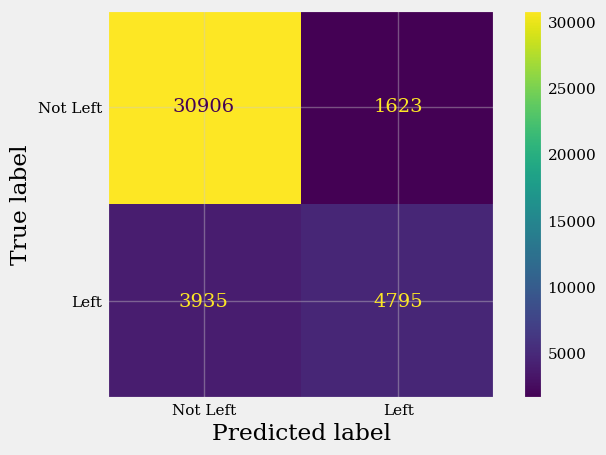

In [126]:
cm = confusion_matrix(y_test, predictions, labels=clf_xgb.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Left', 'Left'])
disp.plot()
plt.show()

In [127]:
# # Round 1

# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.05, 0.01, 0.1],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3, 5]
# }

# optimal_parameters = GridSearchCV(
#     estimator=xgb.XGBClassifier(objective='binary:logistic',
#                                 seed=42,
#                                 subsample=0.9,
#                                 colsample_bytree=0.5),
#     param_grid=param_grid,
#     scoring='roc_auc',
#     verbose=3,
#     n_jobs=10,
#     cv=3
# )

# optimal_parameters.fit(X_train,
#                        y_train,
#                        early_stopping_rounds=10,
#                        eval_metric='auc',
#                        eval_set=[(X_test, y_test)],
#                        verbose=True)

# print(optimal_parameters)


In [37]:
# print(optimal_parameters.best_params_)

In [38]:
# # Round 2

# param_grid = {
#     'max_depth': [5, 6, 7],
#     'learning_rate': [0.1, 0.5, 1],
#     'gamma': [1.0, 1.5, 2],
#     'reg_lambda': [10.0, 25.0,50.0],
#     'scale_pos_weight': [5, 7, 9]
# }

# optimal_parameters = GridSearchCV(
#     estimator=xgb.XGBClassifier(objective='binary:logistic',
#                                 seed=42,
#                                 subsample=0.9,
#                                 colsample_bytree=0.5),
#     param_grid=param_grid,
#     scoring='roc_auc',
#     verbose=3,
#     n_jobs=10,
#     cv=3
# )

# optimal_parameters.fit(X_train,
#                        y_train,
#                        early_stopping_rounds=10,
#                        eval_metric='auc',
#                        eval_set=[(X_test, y_test)],
#                        verbose=True)

# print(optimal_parameters.best_params_)

In [128]:
clf_xgb_v2 = xgb.XGBClassifier(seed=42,
                               objective='binary:logistic',
                               gamma=1.0,
                               learning_rate=0.1,
                               max_depth=5,
                               reg_lambda=10.0,
                               scale_pos_weight=5,
                            #    subsample=0.9,
                            #    colsample_bytree=0.5
                            )

clf_xgb_v2.fit(X_train,
               y_train,
               verbose=True,
               early_stopping_rounds=10,
               eval_metric='auc',
               eval_set=[(X_test,y_test)])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.86903
[1]	validation_0-auc:0.87164
[2]	validation_0-auc:0.87353
[3]	validation_0-auc:0.87418
[4]	validation_0-auc:0.87584
[5]	validation_0-auc:0.87661
[6]	validation_0-auc:0.87745
[7]	validation_0-auc:0.87955
[8]	validation_0-auc:0.87957
[9]	validation_0-auc:0.88044
[10]	validation_0-auc:0.88065
[11]	validation_0-auc:0.88153
[12]	validation_0-auc:0.88189
[13]	validation_0-auc:0.88270
[14]	validation_0-auc:0.88282
[15]	validation_0-auc:0.88294
[16]	validation_0-auc:0.88311
[17]	validation_0-auc:0.88353
[18]	validation_0-auc:0.88385
[19]	validation_0-auc:0.88420
[20]	validation_0-auc:0.88475
[21]	validation_0-auc:0.88491
[22]	validation_0-auc:0.88521
[23]	validation_0-auc:0.88539
[24]	validation_0-auc:0.88577
[25]	validation_0-auc:0.88591
[26]	validation_0-auc:0.88619
[27]	validation_0-auc:0.88638
[28]	validation_0-auc:0.88665
[29]	validation_0-auc:0.88685
[30]	validation_0-auc:0.88702
[31]	validation_0-auc:0.88713
[32]	validation_0-auc:0.88720
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [129]:
predictions_2 = clf_xgb_v2.predict(X_test)

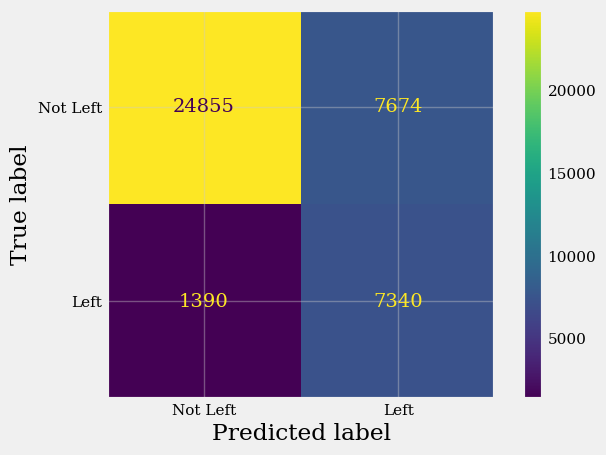

In [130]:
cm = confusion_matrix(y_test, predictions_2, labels=clf_xgb_v2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Left', 'Left'])
disp.plot()
plt.show()

In [56]:
# clf_xgb_v2 = xgb.XGBClassifier(seed=42,
#                                objective='binary:logistic',
#                                gamma=1.0,
#                                learning_rate=0.1,
#                                max_depth=5,
#                                reg_lambda=10.0,
#                                scale_pos_weight=5,
#                                subsample=0.9,
#                                colsample_bytree=0.5,
#                                n_estimators=1)

# clf_xgb_v2.fit(X_train, y_train)

# bst = clf_xgb_v2.get_booster()

# for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
#     print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))


# node_params = {'shape': 'box',
#                'style': 'filled, rounded',
#                'fillcolor': '#78cbe'}


# leaf_params = {'shape': 'box',
#                'style': 'filled',
#                'fillcolor': '#e48038'}


# xgb.to_graphviz(clf_xgb_v2, num_trees=0, size="10,10",
#                 condition_node_params=node_params,
#                 leaf_node_params=leaf_params)

In [63]:
# # sample_submission.head()
# sample_submission = sample_submission.drop(['Exited'], axis=1)
# sample_submission.head()

In [131]:
submission = clf_xgb_v2.predict_proba(X_test_encoded)[:, 1]
submission

array([0.1057311 , 0.9577943 , 0.11270947, ..., 0.08729255, 0.48174956,
       0.5589293 ], dtype=float32)

In [132]:
sample_submission['Exited'] = submission
sample_submission.head()

,id,Exited
0,165034,0.105731
1,165035,0.957794
2,165036,0.112709
3,165037,0.596722
4,165038,0.753602


In [133]:
sample_submission.to_csv(r"F:/Kaggle'24/playground-series-s4e1/submission5.csv", index=False)

In [60]:
clf_xgb_v3 = xgb.XGBClassifier(seed=42,
                               objective='binary:logistic',
                               gamma=1.0,
                               learning_rate=0.1,
                               max_depth=5,
                               reg_lambda=10.0,
                               scale_pos_weight=5,)

clf_xgb_v2.fit(X_train,
               y_train,
               verbose=True,
               early_stopping_rounds=10,
               eval_metric='auc',
               eval_set=[(X_test,y_test)])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.86903
[1]	validation_0-auc:0.87164
[2]	validation_0-auc:0.87353
[3]	validation_0-auc:0.87418
[4]	validation_0-auc:0.87584
[5]	validation_0-auc:0.87661
[6]	validation_0-auc:0.87745
[7]	validation_0-auc:0.87955
[8]	validation_0-auc:0.87957
[9]	validation_0-auc:0.88044
[10]	validation_0-auc:0.88065
[11]	validation_0-auc:0.88153
[12]	validation_0-auc:0.88189
[13]	validation_0-auc:0.88268
[14]	validation_0-auc:0.88281
[15]	validation_0-auc:0.88295
[16]	validation_0-auc:0.88312
[17]	validation_0-auc:0.88357
[18]	validation_0-auc:0.88386
[19]	validation_0-auc:0.88419
[20]	validation_0-auc:0.88442
[21]	validation_0-auc:0.88488
[22]	validation_0-auc:0.88510
[23]	validation_0-auc:0.88539
[24]	validation_0-auc:0.88551
[25]	validation_0-auc:0.88589
[26]	validation_0-auc:0.88605
[27]	validation_0-auc:0.88632
[28]	validation_0-auc:0.88654
[29]	validation_0-auc:0.88680
[30]	validation_0-auc:0.88695
[31]	validation_0-auc:0.88706
[32]	validation_0-auc:0.88718
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
params = { 'objective': 'binary:logistic',
                          'eval_metric'           : "auc",
                        #   'random_state'          : self.state,
                          'colsample_bytree'      : 0.80,
                          'learning_rate'         : 0.082,
                          'max_depth'             : 7,
                          'n_estimators'          : 2000,                         
                          'reg_alpha'             : 0.005,
                          'reg_lambda'            : 0.95,
                          'min_child_weight'      : 26,
                          'early_stopping_rounds' : CFG.nbrnd_erly_stp,
                          'verbosity'             : 0,
                         } 

In [134]:
clf_xgb_v3 = xgb.XGBClassifier(seed=42,
                               objective='binary:logistic',
                               gamma=1.0,
                               learning_rate=0.082,
                               max_depth=7,
                               reg_lambda=0.95,
                               reg_alpha = 0.005,
                               colsample_bytree=0.80,
                               min_child_weight=26,
                               )
clf_xgb_v3.fit(X_train,
               y_train,
               verbose=True,
               early_stopping_rounds=50,
               eval_metric='auc',
               eval_set=[(X_test,y_test)])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.83656
[1]	validation_0-auc:0.87750
[2]	validation_0-auc:0.88180
[3]	validation_0-auc:0.88409
[4]	validation_0-auc:0.88497
[5]	validation_0-auc:0.88532
[6]	validation_0-auc:0.88486
[7]	validation_0-auc:0.88524
[8]	validation_0-auc:0.88564
[9]	validation_0-auc:0.88574
[10]	validation_0-auc:0.88660
[11]	validation_0-auc:0.88657
[12]	validation_0-auc:0.88661
[13]	validation_0-auc:0.88670
[14]	validation_0-auc:0.88668
[15]	validation_0-auc:0.88664
[16]	validation_0-auc:0.88642
[17]	validation_0-auc:0.88660
[18]	validation_0-auc:0.88642
[19]	validation_0-auc:0.88619
[20]	validation_0-auc:0.88658
[21]	validation_0-auc:0.88677
[22]	validation_0-auc:0.88692
[23]	validation_0-auc:0.88702
[24]	validation_0-auc:0.88690
[25]	validation_0-auc:0.88711
[26]	validation_0-auc:0.88723
[27]	validation_0-auc:0.88741
[28]	validation_0-auc:0.88730
[29]	validation_0-auc:0.88745
[30]	validation_0-auc:0.88736
[31]	validation_0-auc:0.88748
[32]	validation_0-auc:0.88739
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.082, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=26, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)